In [2]:
import numpy as np
import pandas as pd
import neattext as nt
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Essayer différents encodages jusqu'à ce que le fichier soit lu correctement
# encodings = ['utf-8', 'latin-1', 'iso-8859-1']

# for encoding in encodings:
#     try:
#         # Charger le fichier TSV dans un DataFrame
#         df = pd.read_csv('test_set.tsv', sep='\t', encoding=encoding)

#         # Enregistrer le DataFrame dans un fichier CSV
#         df.to_csv('test_set.csv', index=False)

#         print(f"Le fichier a été lu avec succès avec l'encodage : {encoding}")
#         break  # Sortir de la boucle si la lecture réussit

#     except UnicodeDecodeError:
#         print(f"Échec de la lecture avec l'encodage : {encoding}")

### Data processing

In [6]:
#reads the contents of the Excel file "training_set.xls" and stores the data in a DataFrame object named "data"
data = pd.read_excel("training_set.xls") 

In [7]:
#creates a copy of the DataFrame object "data" and stores it in a new DataFrame object named "df_copy"
df_copy = data.copy()

In [8]:
#displays the first five rows of the DataFrame object "df_copy"
df_copy.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#counts the number of missing values (NaNs) in each column of the DataFrame object and displays a summary of the counts
df_copy.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64

In [9]:
#selects a subset of the DataFrame object, keeping only the listed columns
df = df_copy[["essay_id", "essay_set", "essay", "rater1_domain1", "rater2_domain1", "domain1_score"]]

In [10]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


In [17]:
# Fill NaN values with 0
df.fillna(0, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1900\2475422004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [12]:
#counts the number of missing values (NaNs) in each column of the DataFrame object and displays a summary of the counts
df.isnull().sum()

essay_id          0
essay_set         0
essay             0
rater1_domain1    0
rater2_domain1    0
domain1_score     0
dtype: int64

In [79]:
# Display the last five rows of the DataFrame `df`.
df.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,35.0
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,32.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0
12977,21633,8,Many people believe that laughter can improve...,20.0,20.0,40.0


In [13]:
# Display the data types of each column in the DataFrame `df`.
df.dtypes

essay_id            int64
essay_set           int64
essay              object
rater1_domain1    float64
rater2_domain1    float64
domain1_score     float64
dtype: object

In [81]:
# Counts the number of missing values (NaNs) in each column of the DataFrame `df` and displays a summary of the counts.
df.isnull().sum().to_frame("Null values")

,Null values
essay_id,0
essay_set,0
essay,0
rater1_domain1,0
rater2_domain1,0
domain1_score,0


In [18]:
# Displays the dimensionality of the DataFrame `df`, including the number of rows and columns.   
df.shape

(12978, 6)

In [15]:
# Provides a concise summary of the DataFrame `df`, including its structure, data types, memory usage, and non-null value counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12978 non-null  float64
 4   rater2_domain1  12978 non-null  float64
 5   domain1_score   12978 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 608.5+ KB


In [16]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12978.000000,12978.000000,12978.000000,12978.000000,12978.000000
mean,10295.432809,4.179458,4.126522,4.136770,6.799199
std,6308.588616,2.136749,4.212531,4.264311,8.970411
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4439.250000,2.000000,2.000000,2.000000,2.000000
50%,10045.500000,4.000000,3.000000,3.000000,3.000000
75%,15680.750000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


In [85]:
# Provides a summary of the descriptive statistics of numerical columns in the DataFrame `df`, including measures of central tendency, dispersion, and the number of non-null values.
set(df["essay_set"])

{1, 2, 3, 4, 5, 6, 7, 8}

In [86]:
# Provides a summary of the descriptive statistics of numerical columns in the DataFrame `df`, including measures of central tendency, dispersion, and the number of non-null values.
set(df["domain1_score"])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 55.0,
 60.0}

In [87]:
# Displays the frequency distribution of the values in the `domain1_score` column of the DataFrame `df`.
df["domain1_score"].value_counts()

domain1_score
3.0     2830
2.0     2445
1.0     1736
4.0     1424
8.0      737
0.0      420
9.0      383
10.0     372
16.0     199
11.0     165
7.0      163
40.0     161
17.0     160
6.0      137
12.0     133
18.0     118
14.0     105
20.0     103
24.0      99
5.0       96
19.0      88
15.0      86
13.0      82
21.0      70
36.0      65
22.0      63
23.0      53
30.0      49
35.0      47
37.0      39
34.0      39
32.0      37
31.0      34
33.0      32
45.0      31
42.0      23
41.0      22
38.0      20
43.0      15
44.0      14
50.0      13
46.0      13
28.0      11
39.0       8
29.0       8
47.0       7
27.0       6
25.0       5
26.0       4
48.0       3
55.0       2
49.0       2
60.0       1
Name: count, dtype: int64

In [88]:
# Calculates the percentage of essays that received each score in the `domain1_score` column of the DataFrame `df` and rounds the results to two decimal places.
round(df["domain1_score"].value_counts(normalize=True) * 100, 2)

domain1_score
3.0     21.81
2.0     18.84
1.0     13.38
4.0     10.97
8.0      5.68
0.0      3.24
9.0      2.95
10.0     2.87
16.0     1.53
11.0     1.27
7.0      1.26
40.0     1.24
17.0     1.23
6.0      1.06
12.0     1.02
18.0     0.91
14.0     0.81
20.0     0.79
24.0     0.76
5.0      0.74
19.0     0.68
15.0     0.66
13.0     0.63
21.0     0.54
36.0     0.50
22.0     0.49
23.0     0.41
30.0     0.38
35.0     0.36
37.0     0.30
34.0     0.30
32.0     0.29
31.0     0.26
33.0     0.25
45.0     0.24
42.0     0.18
41.0     0.17
38.0     0.15
43.0     0.12
44.0     0.11
50.0     0.10
46.0     0.10
28.0     0.08
39.0     0.06
29.0     0.06
47.0     0.05
27.0     0.05
25.0     0.04
26.0     0.03
48.0     0.02
55.0     0.02
49.0     0.02
60.0     0.01
Name: proportion, dtype: float64

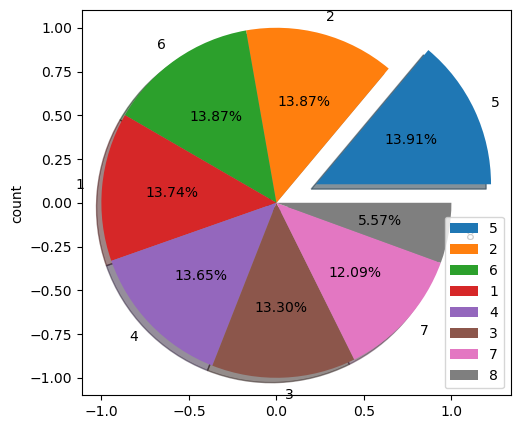

In [89]:
explode = [0.25, 0, 0, 0, 0, 0, 0, 0]

# Creates a pie chart to visualize the distribution of essays across the different essay sets.

df["essay_set"].value_counts().plot.pie(figsize=(7, 5), autopct="%.2f%%", shadow=True, frame=True, explode=explode).legend();

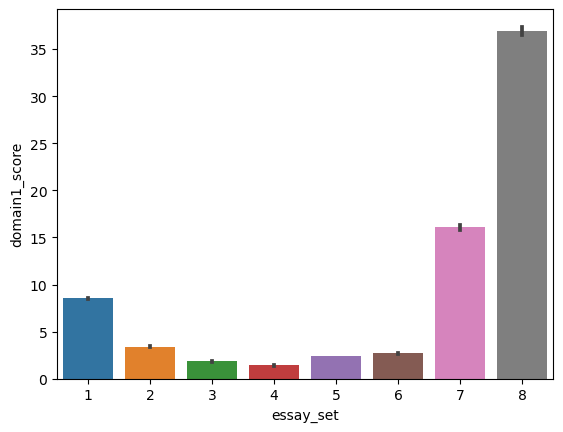

In [90]:
# Creates a bar chart to visualize the average domain1_score of essays across different essay sets.
sns.barplot(x=df["essay_set"], y=df["domain1_score"]);